# Technitrade

**Technical Analysis Demo**

In [1]:
import pandas as pd
import os, time
import technicals

os.chdir("../marketdata")
import alpaca

In [2]:
from datetime import date, datetime, timedelta

end_date  = datetime.now()
start_date  = (end_date - timedelta(days=1000))

start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

print(f"Start date : {start_date}")
print(f"End date : {end_date}")

Start date : 2018-10-17
End date : 2021-07-13


In [7]:
# Tickers
test_tickers = ["KO"]

In [8]:
# Get market data 
ohlcv_df = alpaca.ohlcv(test_tickers, start_date=start_date, end_date=end_date)

In [9]:
ohlcv_df.head() 

KO                                  
                            open    high     low   close    volume
time                                                              
2018-10-17 00:00:00-04:00  45.41  45.990  45.360  45.855   8034046
2018-10-18 00:00:00-04:00  45.90  46.080  45.455  45.640   9403895
2018-10-19 00:00:00-04:00  45.82  46.490  45.820  46.320  11087680
2018-10-22 00:00:00-04:00  46.37  46.455  45.810  45.960   8837220
2018-10-23 00:00:00-04:00  45.62  46.455  45.450  46.360  14166742

In [10]:
tech_ind = technicals.TechnicalAnalysis(ohlcv_df)

In [12]:
ticker_df = tech_ind.get_all_technicals("KO")

In [13]:
ticker_df = ticker_df[14:-14]

In [14]:
ticker_df.head()

,open,high,low,close,volume,rsi,williams,mfi,stoch_k,macd,...,ma_50,ma_200,ema_7,ema_14,ema_21,highlow,closeopen,bb_high,bb_low,pvt
time,,,,,,,,,,,,,,,,,,,,,
2018-11-06 00:00:00-05:00,48.65,49.13,48.6000,49.10,10529456,61.435887,-0.810811,64.724927,70.495367,0.363269,...,0.0,0.0,48.062074,47.583942,47.389754,0.5300,0.45,0.0,0.0,-87912.367687
2018-11-07 00:00:00-05:00,49.39,49.55,49.0301,49.37,9706376,63.351266,-4.368932,71.833834,63.664182,0.428035,...,0.0,0.0,48.392366,47.848928,47.619852,0.5199,-0.02,0.0,0.0,-35289.366714
2018-11-08 00:00:00-05:00,49.12,49.37,49.1000,49.34,7953559,62.978885,-5.097087,64.544438,57.249480,0.470260,...,0.0,0.0,48.631069,48.066873,47.814798,0.2700,0.22,0.0,0.0,-58208.215305
2018-11-09 00:00:00-05:00,49.39,49.89,49.3600,49.68,9961683,65.445266,-4.708520,71.634922,54.823030,0.518262,...,0.0,0.0,48.894788,48.299670,48.021548,0.5300,0.29,0.0,0.0,73478.597468
2018-11-12 00:00:00-05:00,49.61,50.24,49.5400,49.88,12093181,66.837685,-7.484407,71.795379,48.918176,0.561678,...,0.0,0.0,49.142137,48.525257,48.223522,0.7000,0.27,0.0,0.0,-19961.262327


---
## Technical Indicators

### RSI - Relative Strenght Index

$$RSI = 100 - \left(\frac{100}{1+Relative\:Strenght}\right)$$

where:
*relative strenght* (*RS*)= *average gain* - *average loss*

[Relative Strenght Index](https://www.investopedia.com/terms/r/rsi.asp)

array([<AxesSubplot:xlabel='time'>], dtype=object)

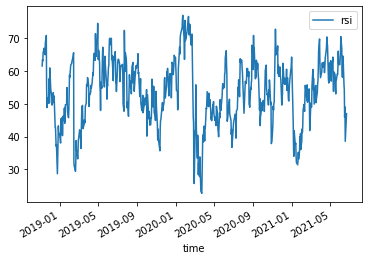

In [16]:
ticker_df[['rsi']].plot(subplots=True)

#### Williams %R - William's Percent Range

$$Williams Percent Range=\left(\frac{Highest High-Close}{Highest High-Lowest Low}\right)$$

where:<br>
*Highest High* = Highest price in the lookback period.<br>
*Close* = Most recent closing price.<br>
*Lowest Low* = Lowest price in the lookback period.<br>

[William %R](https://www.investopedia.com/terms/w/williamsr.asp)

array([<AxesSubplot:xlabel='time'>], dtype=object)

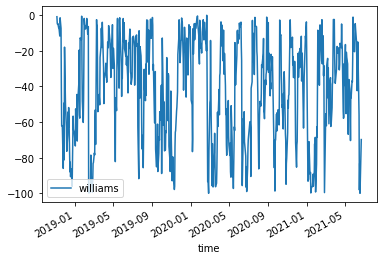

In [17]:
ticker_df[['williams']].plot(subplots=True)

#### Aroon Indicator

$$Aroon\:Up= \frac{a_{period} - n_{periods}\:since\:a_{period} max}{a_{period}} * 100$$

$$Aroon\:Down= \frac{a_{period} - n_{periods}\:since\:a_{period} min}{a_{period}} * 100$$

$$Aroon\:Oscillator=Aroon\:Up - Aroon\:Down$$

where:
*where **a<sub>period</sub>** = period of time to be measured*

[Aroon Oscillator](https://www.investopedia.com/terms/a/aroon.asp)

In [18]:
# ticker_df[['aroon', 'close']].plot(subplots=True)

### Money Flow Index

* Positive money flow is calculated by adding the money flow of all the days where the typical price is higher than the previous day's typical price.
* Negative money flow is calculated by adding the money flow of all the days where the typical price is lower than the previous day's typical price.
* If typical price is unchanged then that day is discarded.
* The money flow is divided into positive and negative money flow.

$$Typical\:Price= \frac{(High + Low + Close)}{3}$$

$$Raw\:Money\:Flow= Typical\:Price\:*\:Volume$$

$$Money\:Flow\:Ratio= \frac{14-period\:Positive\:Money\:Flow}{(14-period\:Negative\:Money Flow)}$$

$$Money\:Flow\:Index= 100 - \frac{100}{(1 + Money\:Flow\:Ratio)}$$

[Money flowindex](https://en.wikipedia.org/wiki/Money_flow_index)

array([<AxesSubplot:xlabel='time'>], dtype=object)

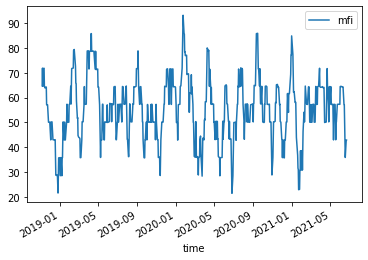

In [19]:
ticker_df[['mfi']].plot(subplots=True)

### Stoichastic Oscillator

$$Stoichastic\:Oscillator= \left(\frac{Close - Low_n}{High_n - Low_n}\right) * 100$$

where:
* C = The most recent closing price
* Low<sub>*n*</sub> = The lowest price traded of the *n* previous trading sessions
* High<sub>*n*</sub> = The highest price traded during the same *n*-day period
* %K = The current value of the stochastic indicator


[Stochastic Oscillator](https://www.investopedia.com/terms/s/stochasticoscillator.asp)

array([<AxesSubplot:xlabel='time'>], dtype=object)

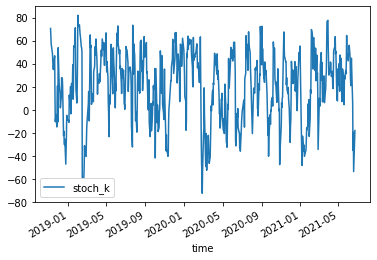

In [20]:
ticker_df[['stoch_k']].plot(subplots=True)

### MACD

$$PVT= \left[\left(\frac{Current\:Close - Previous\:Close}{Previous\:Close}\right)*Volume\right] + Previous\:PVT$$

[MACD](https://www.investopedia.com/terms/m/macd.asp)

array([<AxesSubplot:xlabel='time'>], dtype=object)

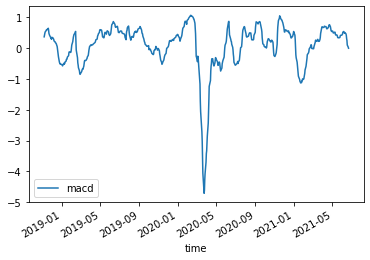

In [21]:
ticker_df[['macd']].plot(subplots=True)

### Moving Average

$$Moving\:Average=\frac{A_1 + A_2 + A_3}{n}$$

where:

* *A* = Average in period *n*
* *n* = Number of time periods

[Moving Average](https://www.investopedia.com/terms/m/movingaverage.asp)

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

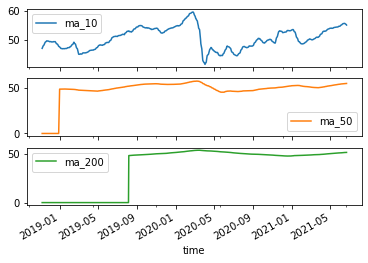

In [22]:
ticker_df[['ma_10', 'ma_50', 'ma_200']].plot(subplots=True)

### Exponential Moving Average

$$EMA_t=\left[V_t * \left(\frac{s}{1+d}\right)\right]+EMA_y$$

where:

* *EMA<sub>t</sub>* = = EMA today
* *EMA<sub>y</sub>* = = EMA yesterday
* *V<sub>t</sub>* = Value today
* *s* = smoothing
* *d* = number of days

[Exponential Moving Average](https://www.investopedia.com/terms/m/movingaverage.asp)

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

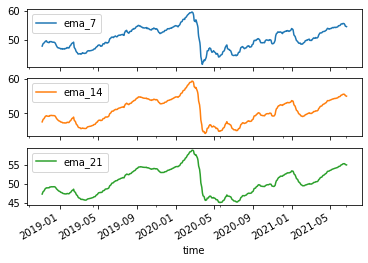

In [23]:
ticker_df[['ema_7', 'ema_14', 'ema_21']].plot(subplots=True)

### High Low

$$High\:Low = High - Low$$

Difference between the high and low prices of the day

array([<AxesSubplot:xlabel='time'>], dtype=object)

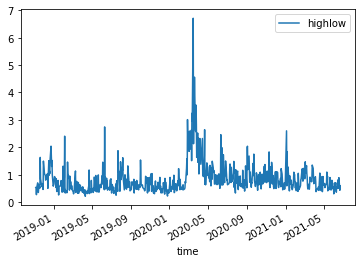

In [24]:
ticker_df[['highlow']].plot(subplots=True)

### Close Open

$$Close\:Open = Close - Open$$

Difference between the close and open prices of the day

array([<AxesSubplot:xlabel='time'>], dtype=object)

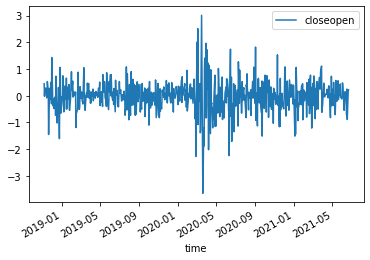

In [25]:
ticker_df[['closeopen']].plot(subplots=True)

### Bollinger Bands

$$Bollinger\:High=Moving\:Average + m * σ[Closing\:Price, n]$$
$$Bollinger\:Low=Moving\:Average - m * σ[Closing\:Price, n]$$

where:
* *m* = number of standard deviations
* *n* = number of days in the smoothing period

[Bollinger Bands](https://www.investopedia.com/terms/b/bollingerbands.asp)

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

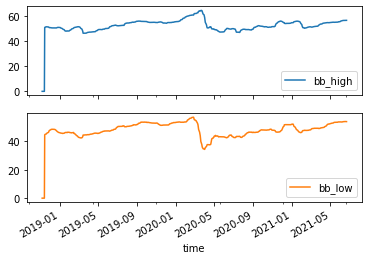

In [27]:
ticker_df[['bb_high','bb_low']].plot(subplots=True)